In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\mubashir khan\appdata\local\programs\python\python312\lib\site-packages\spylon_kernel-0+unknown-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.8 MB 365.7 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.8 MB 1.0 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 2.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/1.8 MB 2.7 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 2.9 MB/s eta 0:00:01
   -------------------------------- ------- 1.5/1.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: pip
 

DEPRECATION: Loading egg at c:\users\mubashir khan\appdata\local\programs\python\python312\lib\site-packages\spylon_kernel-0+unknown-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



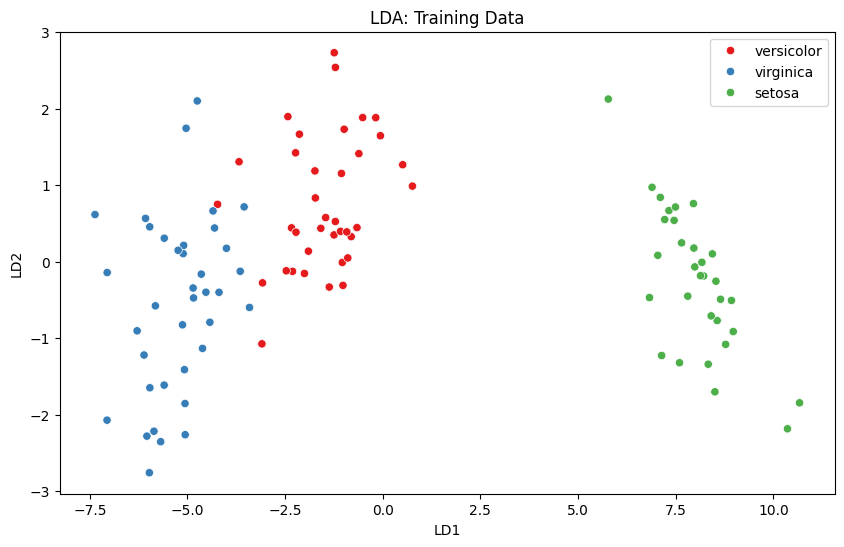

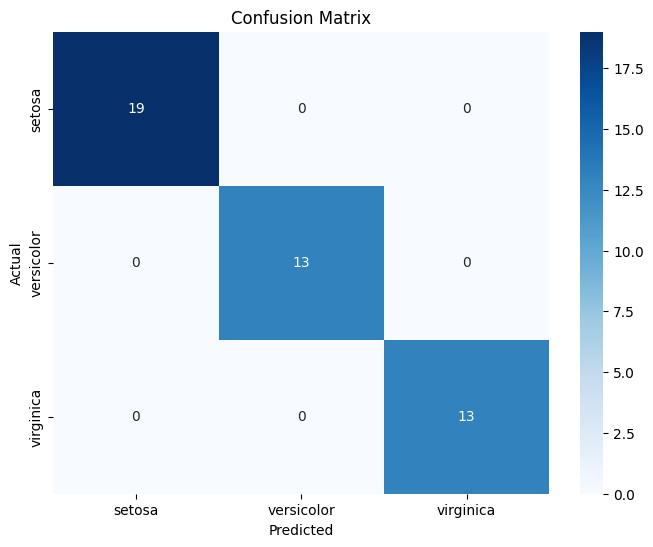

The predicted species for the new sample is: setosa


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
iris = pd.read_csv(url)

# Display the first few rows of the dataset
print(iris.head())

# Separate the features and the target variable
X = iris.drop(columns='species')
y = iris['species']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier (Logistic Regression)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_lda, y_train)

# Predict the species of the test set
y_pred = classifier.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plot LDA transformed features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=y_train, palette='Set1')
plt.title('LDA: Training Data')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Example: Classify a new sample
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)  # Replace with the measurements of the new flower
new_sample_scaled = scaler.transform(new_sample)
new_sample_lda = lda.transform(new_sample_scaled)
predicted_species = classifier.predict(new_sample_lda)

print(f"The predicted species for the new sample is: {predicted_species[0]}")